# Trabajo 2 Almacenamiento y Recuperación de la información
## Pablo Correa Morales
## Luis Fernando Posada
## Juan Pablo Leal
## Universidad EAFIT 
## 2022-1

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') #linea para la creación de un directorio virtual dentro del Google Drive

Mounted at /content/gdrive


### Librerias necesarias para el desarrollo:
#### 1. nltk  es una de las librerias mas usadas para el procesamiento de lenguaje natural
#### 2. pandas es una libreria para el procesamiento de dataframes. Sera util en esta implementación para la preparación de los datos. Para esto tambien utilizamos numpy.
#### 3. Tambien se hace uso de re - expresiones regulares, con lo cual se determinan alfabetos validos que definamos.
####4. El uso de matplotlib es para la visualización de los datos.

En este primer paso se instala la libreria NLTK 

In [ ]:
!pip install nltk

Luego se importan todas las librerias necesarias para utilizar en el resto del codigo

In [ ]:
import base64
import requests
import nltk
import codecs
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

En este paso se define la URL de la cual se va a obtener el archivo de texto que se va a analizar. Este dato se obtiene del repositorio de la materia. Luego el objetivo es realizar el tokenizer inicial que es el que separa las palabras y las deja en un array. Al final se imprime su longitud.

In [ ]:
text_name = "wiki-single-file"
url = f'https://raw.githubusercontent.com/st1800eafit/st1800-st1801-2261/main/datasets/trabajo2/{text_name}.txt'
path_out="/content/gdrive/MyDrive/Noveno Semestre/Alm. Y Recu. Datos/Proiecto2/out/"
file = requests.get(url).text #Bring the text file from Github with a GET request
file = file.lower()  #Lower the cases for all the words in the text file.
tokenizer = nltk.RegexpTokenizer(r'\w+') #Create tokenizer to ignore special characters
tokens = tokenizer.tokenize(file) #Create array with tokens from the text file
print(len(tokens)) #Print the length of the array 'tokens'

1849969


Se descargan herramientas de NLTK que serán necesarias.

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Se filtran las palabras para dejar los tokens que no están en los stopwords

In [ ]:
filtered_words = [word for word in tokens if word not in stopwords.words('english')]
print(len(filtered_words))

1182230


Se importa el componente de NLTK para verificar que un token pertenezca a un diccionario. Se convierte el arreglo de palabras a set y se verifica que la palabra pertenezca a ese diccionario. Al final se hace una verificación adicional de que el token si sea alfa numérico.

In [ ]:
# permite verificar en nltk si un token pertenece a diccionario de un idioma, en este caso a 'english'
from nltk.corpus import words as voc_en

x = voc_en.words()
set_voc_en = set(x) # Se convierte el array de palabras en ingles a un set para tener un una complejidad de O(1)
print(type(set_voc_en))
# verifica si una palabra pertenece al diccionario:
# Usamos word.alpha para verificar que si se tengan valores alfanumericos, tambien se puede hacer uso de re.sub(r'[^A-Za-z0-9]) para realizar la verifación
filtered_english_words = [word for word in filtered_words if (len(word) >1) and word.isalpha() and (word in set_voc_en)] # Con lo que se logra que en este siglo se tenga una complejidad de O(n)
print(len(filtered_english_words))
print(type(filtered_english_words))

<class 'set'>
662584
<class 'list'>


Se sacan las 20 palabras más comunes de esa distribución y se realiza una gráfica que muestra la cantidad de veces que aparece cada palabra.

numero de palabras finales =  23829
[('also', 4321), ('first', 4078), ('one', 3655), ('new', 3613), ('two', 2856), ('time', 2443), ('small', 2313), ('born', 1820), ('may', 1795), ('year', 1783), ('school', 1672), ('national', 1667), ('state', 1623), ('de', 1620), ('would', 1612), ('city', 1611), ('world', 1600), ('season', 1578), ('university', 1535), ('later', 1524)]


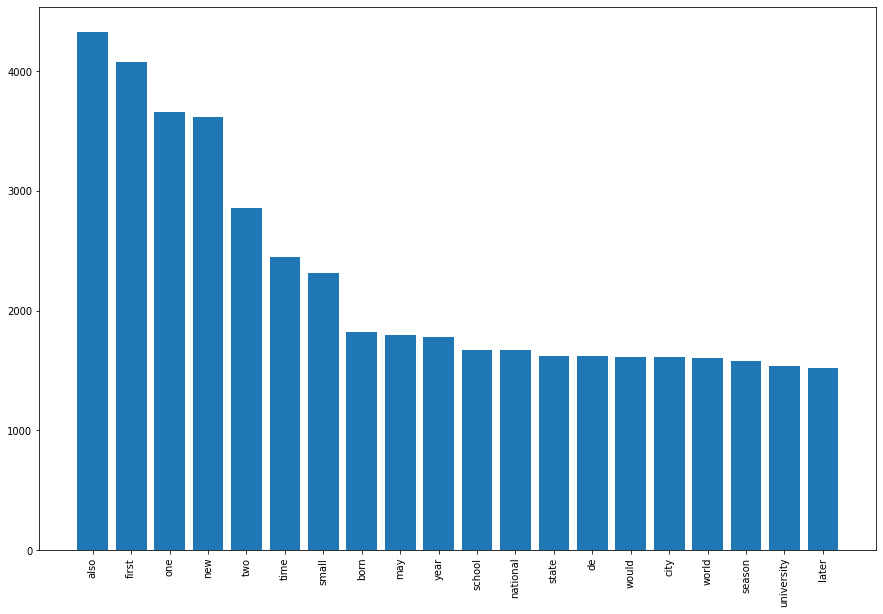

In [ ]:
fdist = nltk.FreqDist(filtered_english_words)
print('numero de palabras finales = ',len(fdist))
topwords = fdist.most_common(20)
print(topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Para hacer stemming con NLTK se importan las librerias necesarias y se realizan pruebas con las opciones de Porter y Lancaster. Se obtuvieron mejores resultados y más lógicos con Porter entonces se seleccionó. Se sacan las 20 palabras más comunes y se grafican el número de veces que aparecen.

numero de palabras finales =  18486


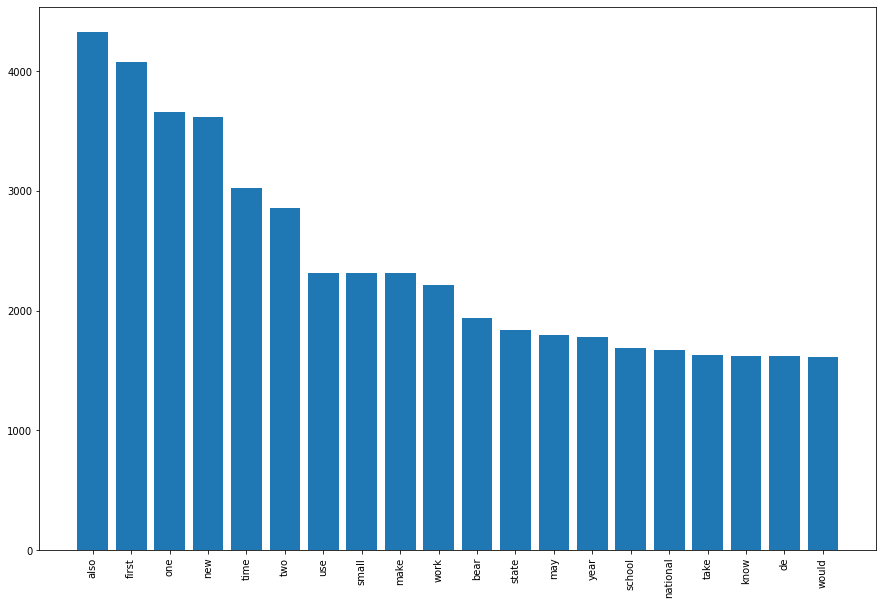

In [ ]:
# Stemming con NLTK

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()
# probar cada una de las siguientes opciones: porter y lancaster.
stemm_words = [porter.stem(word) for word in filtered_english_words] #Se elige Porter puesto que lanzaba resultados mas logicos para estos datos
#stemm_words = [lancaster.stem(word) for word in filtered_english_words]

fdist_stemm = nltk.FreqDist(stemm_words)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist_stemm))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Para realizar la lematización se importan las librerías  y también se realizan pruebas con las palabras que se filtraron previamente. Como en las anteriores se sacan las 20 palabras más comunes de la distribución y se grafican con respecto al número de veces que aparecen.

numero de palabras finales =  21786


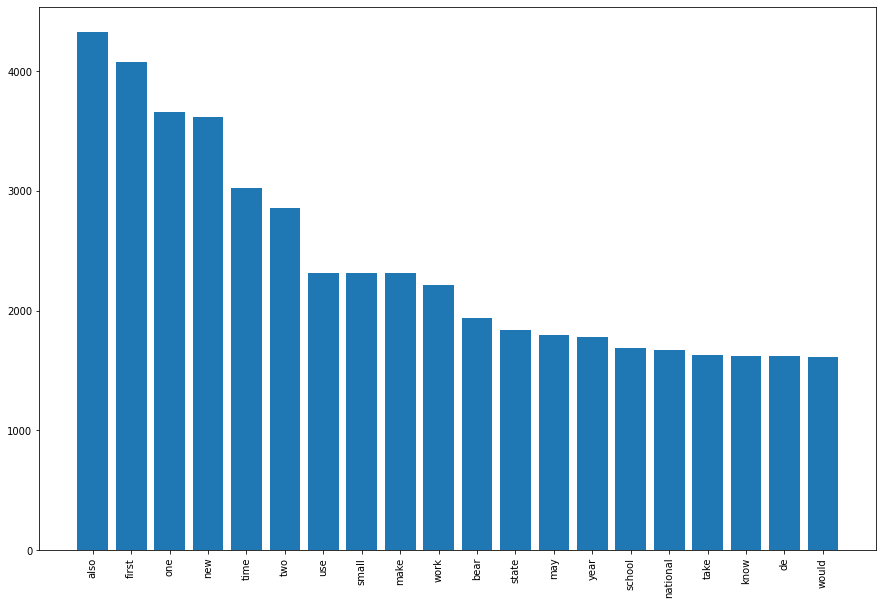

In [ ]:
# Lemmatization con NLTK
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

# probar cada una de las siguientes opciones: 
lemm_words = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in filtered_english_words ]
#lemm_words = [wordnet_lemmatizer.lemmatize(w) for w in filtered_english_words ]

fdist_lemm = nltk.FreqDist(lemm_words)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist_lemm))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
output_file_clean = open(path_out+"lemmatizer"+text_name, "w")

In [ ]:
line_clean = ""
for word in lemm_words:
    line_clean=line_clean+word+" "
        
if (line_clean!=""):
    line_clean=line_clean+"\n"
    output_file_clean.write(line_clean)
output_file_clean.close()        

In [ ]:
word_freq_lemm = fdist.most_common(len(fdist_lemm))

In [ ]:
import csv

with open(path_out+"CSVlemmatizer"+text_name, 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(["word", "frecuency"])
    writer.writerows(word_freq_lemm)

csvFile.close()

In [ ]:
output_file_clean_stemm = open(path_out+"stemmen-"+text_name, "w")

In [ ]:
line_clean = ""
for word in stemm_words:
    line_clean=line_clean+word+" "
        
if (line_clean!=""):
    line_clean=line_clean+"\n"
    output_file_clean_stemm.write(line_clean)
output_file_clean_stemm.close()      

In [ ]:
word_freq_stemm = fdist.most_common(len(fdist_stemm)) 

('also', 4321) ('first', 4078) ('one', 3655) ('new', 3613) ('time', 3019) ('two', 2856) ('use', 2315) ('small', 2313) ('make', 2310) ('work', 2215) ('bear', 1935) ('state', 1840) ('may', 1795) ('year', 1783) ('school', 1684) ('national', 1667) ('take', 1625) ('know', 1622) ('de', 1620) ('would', 1612) ('city', 1611) ('world', 1600) ('season', 1584) ('university', 1535) ('unite', 1527) ('later', 1524) ('south', 1489) ('three', 1483) ('many', 1473) ('build', 1412) ('part', 1403) ('team', 1401) ('second', 1356) ('album', 1308) ('north', 1291) ('music', 1270) ('county', 1263) ('name', 1255) ('film', 1254) ('base', 1220) ('live', 1215) ('high', 1211) ('go', 1207) ('series', 1200) ('include', 1195) ('history', 1169) ('well', 1169) ('however', 1165) ('leave', 1158) ('war', 1146) ('end', 1145) ('league', 1141) ('house', 1139) ('write', 1139) ('give', 1130) ('people', 1126) ('lead', 1122) ('early', 1117) ('area', 1106) ('group', 1102) ('follow', 1096) ('life', 1086) ('since', 1069) ('family', 1

In [ ]:
with open(path_out+"CSVstemmen-"+text_name, 'w') as csvFile: #Guardado en disco de los csv generados con las frecuencias.
    writer = csv.writer(csvFile)
    writer.writerow(["word", "frecuency"])
    writer.writerows(word_freq_lemm)

csvFile.close()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Implementacion de guardado de pickles con scikit learn del procesamiento con lemmatizer 
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(lemm_words)

path_vect_carac = path_out + "CountVectorizer_lemm_carac.pkl"
path_vect_mdl = path_out + "CountVectorizer_lemm_mdl.pkl"

with open(path_vect_carac, 'wb') as fout:
    pickle.dump(features , fout)
with open(path_vect_mdl, 'wb') as fout:
    pickle.dump(vectorizer , fout)